# SPARC-4 products
***

This notebook shows an example for viewing and accessing the SPARC4 data products.

* Eder Martioli, LNA 18 Apr 2024

In [1]:
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sparc4.product_plots as s4plt
import sparc4.pipeline_lib as s4pipelib

### Set paths to example files 
Below we set the paths to example files, which are sparc4-pipeline products obtained from the reduction of data in the [minidata package](https://drive.google.com/file/d/1tAVjyhYGMDcrU5sDdGCmd_f5HoazZ294/view?usp=drive_link).

In [2]:
db_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250325/sparc4acs4/20250325_sparc4acs4_db.csv'

phot_lightcurve_example ='/media/fernando/KINGSTON/Doutorado/2025/reduced/20250325/sparc4acs4/20250325_s4c4_v1025cen_POLAR_L4_S+N_lc.fits'

polar_stack_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250325/sparc4acs4/20250325_s4c4_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_stack.fits'

polar_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250325/sparc4acs4/20250325_s4c4_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits'

polar_time_series_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250325/sparc4acs4/20250325_s4c4_v1025cen_POLAR_L4_ts.fits'

# DB product example
***
In this simple example, we just read the database created by the `sparc4-pipelin` and print it as a pandas table. It's an easy way to quickly access the log of observations.

In [3]:
db = ascii.read(db_example)
pd.DataFrame(np.array(db))

,FILE,DATE-OBS,EXPTIME,RA,DEC,OBJECT,OBSTYPE,INSTMODE,CHANNEL,VBIN,...,VCLKAMP,CCDSERN,PREAMP,READRATE,EMMODE,EMGAIN,WPPOS,WPSEL,CALW,ASEL
0,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-25T21:02:15.808000,0.3,0,0,DOMEFLAT,FLAT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,1,L4,None,True
1,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-25T21:02:17.228063,0.3,0,0,DOMEFLAT,FLAT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,1,L4,None,True
2,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-25T21:02:18.648126,0.3,0,0,DOMEFLAT,FLAT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,1,L4,None,True
3,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-25T21:02:20.068189,0.3,0,0,DOMEFLAT,FLAT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,1,L4,None,True
4,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-25T21:02:21.488251,0.3,0,0,DOMEFLAT,FLAT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,1,L4,None,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-26T08:02:58.878000,100.0,12:38:16.2,-38:42:45.6,V1025Cen,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,12,L4,None,True
1495,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-26T08:04:41.281000,100.0,12:38:16.2,-38:42:45.6,V1025Cen,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,13,L4,None,True
1496,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-26T08:06:23.683000,100.0,12:38:16.2,-38:42:45.6,V1025Cen,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,14,L4,None,True
1497,/media/fernando/KINGSTON/Doutorado/2025/202503...,2025-03-26T08:08:06.085000,100.0,12:38:16.2,-38:42:45.6,V1025Cen,OBJECT,POLAR,4,1,...,Normal,9917,Gain 2,1.0,Conventional,2,15,L4,None,True


# POLAR products example
***
In this example we show how to work with the polarimetric products of SPARC4

We start by reading the science image FITS file and showing its information. 

In [4]:
hdul = fits.open(polar_stack_example)
hdul.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250325/sparc4acs4/20250325_s4c4_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_stack.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     169   (1024, 1024)   float64   
  1  CATALOG_POL_S_AP005    1 TableHDU        51   60R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  2  CATALOG_POL_N_AP005    1 TableHDU        51   60R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  3  CATALOG_POL_S_AP008    1 TableHDU        51   60R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  4  CATALOG_POL_N_AP008    1 TableHDU        51   60R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  5  CATALOG_POL_S_AP010    1 TableHDU        51   60R x 13C   [I11, D25.17,

Then we plot the science frame using the `sparc4.product_plots` library

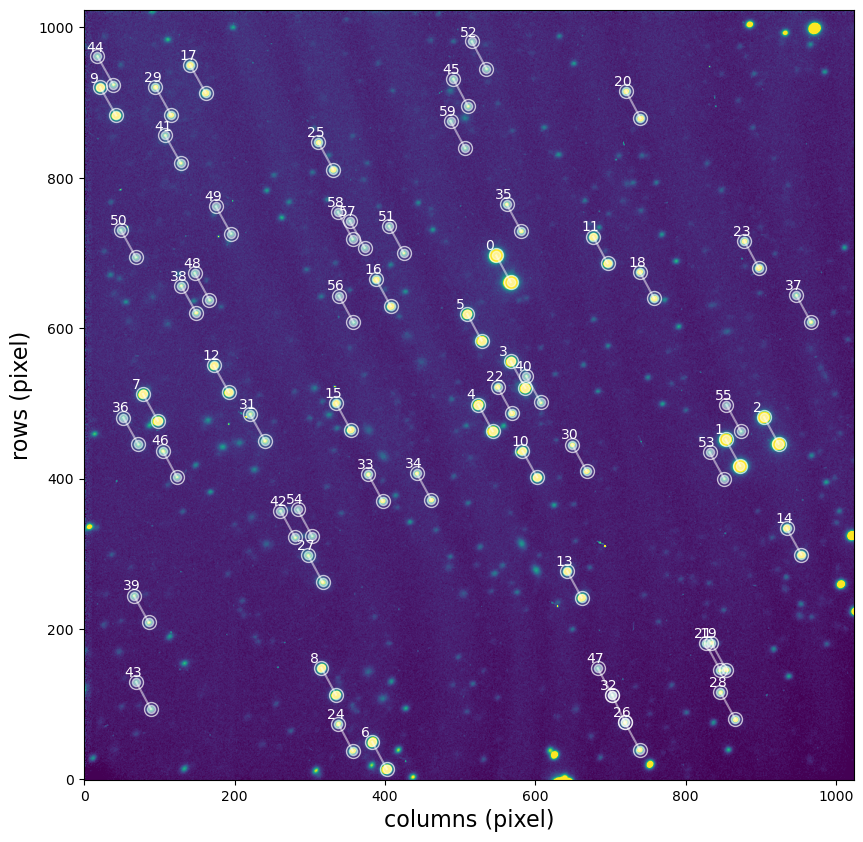

In [5]:
s4plt.plot_sci_polar_frame(polar_stack_example)

Now print one of the catalogs to see its contents

In [6]:
catalog = 'CATALOG_POL_N_AP010'
pd.DataFrame(hdul[catalog].data)

,SRCINDEX,RA,DEC,X,Y,FWHMX,FWHMY,MAG,EMAG,SKYMAG,ESKYMAG,APER,FLAG
0,0,189.564727,-38.693948,567.204794,661.169291,6.443074,6.443074,-9.745902,0.001593,-9.182393,0.000584,10,0
1,1,189.527349,-38.716307,872.545316,416.740529,6.504033,6.504033,-9.417694,0.001984,-9.172064,0.000610,10,0
2,2,189.521277,-38.713423,923.537750,446.280666,6.493695,6.493695,-9.229092,0.002270,-9.172799,0.000642,10,0
3,3,189.562043,-38.707146,586.624842,520.495837,6.348315,6.348315,-8.459465,0.004026,-9.177617,0.000621,10,0
4,4,189.567129,-38.712619,543.296705,463.121176,6.390993,6.390993,-8.419163,0.004139,-9.177632,0.000594,10,0
5,5,189.569197,-38.701328,528.581820,583.584105,6.341276,6.341276,-8.304119,0.004550,-9.182179,0.000609,10,0
6,6,189.583039,-38.755039,402.396728,13.819307,7.006853,7.006853,-8.114794,0.005290,-9.161690,0.000649,10,0
7,7,189.620915,-38.712163,98.033549,476.907421,6.645847,6.645847,-8.050356,0.005499,-9.179552,0.000511,10,0
8,8,189.591418,-38.745920,334.921491,112.563939,6.844688,6.844688,-7.747778,0.007024,-9.164334,0.000521,10,0
9,9,189.628719,-38.673985,42.456312,882.987724,6.561121,6.561121,-7.730438,0.007289,-9.187275,0.000607,10,0


Below we select the source with index number 3 assigned as the main target to be analyzed. Then we select three other stars with indices 0, 1, and 2, as comparisons for differential photometry. All indices are displayed in the image above.  

After selecting the stars we use the function `s4plt.plot_light_curve` to produce plots of the lightcurve data.

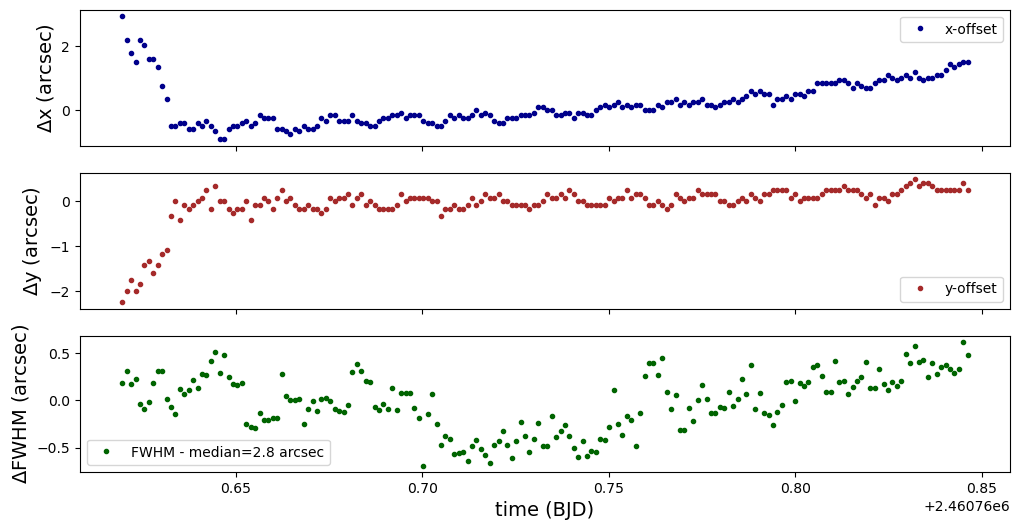

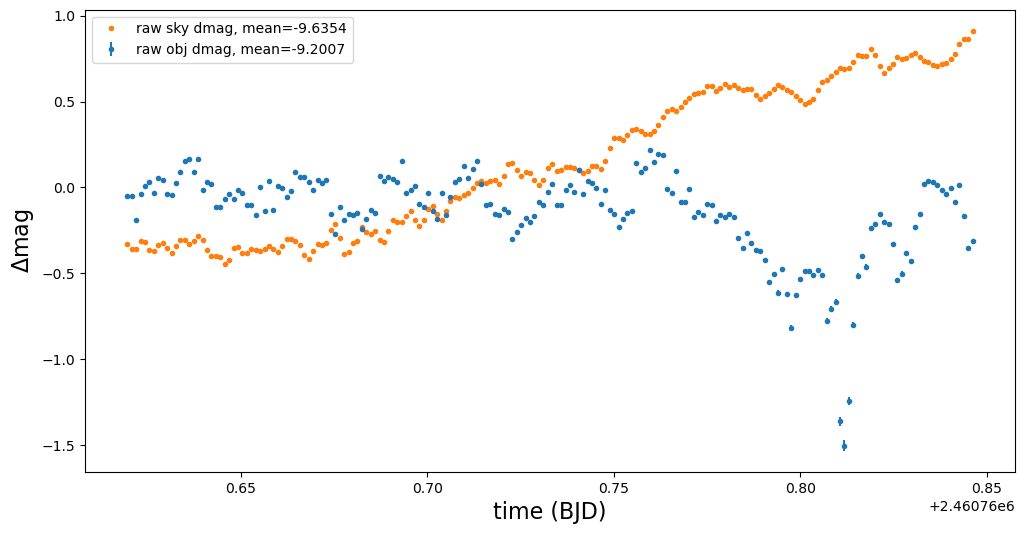

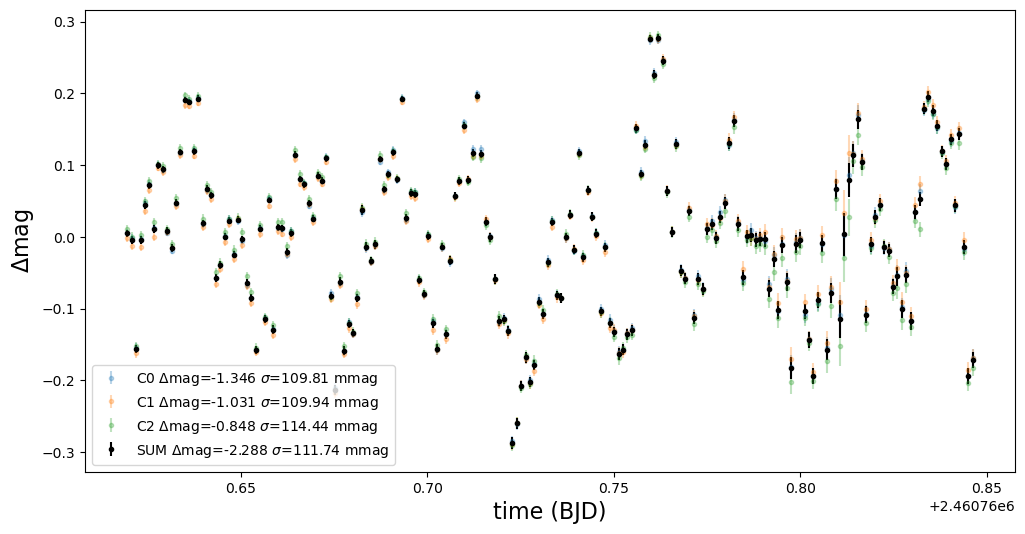

       TIME                x         ...       diffmagsum     
------------------ ----------------- ... ---------------------
 2460760.619578606 533.6826859938463 ...  0.004644730479325787
 2460760.620766513 531.4326859938463 ... -0.004506436153514315
2460760.6219517924 530.1826859938463 ...   -0.1560780947745446
 2460760.623136991 529.4326859938463 ... -0.004518922871390885
 2460760.624322618 531.4326859938463 ...     0.044433836155644
 2460760.625509854 530.9326859938463 ...   0.07210855924992465
2460760.6266954225 529.6826859938463 ...  0.010857611128455957
               ...               ... ...                   ...
2460760.8390600616 528.1826859938463 ...   0.10130891112141605
2460760.8402466937 528.6826859938463 ...   0.13582309611677168
2460760.8414343097 529.1826859938463 ...   0.04376956686443911
2460760.8426195644 528.9326859938463 ...    0.1435015284451815
2460760.8438048074 529.1826859938463 ... -0.013844255093827584
2460760.8449900504 529.4326859938463 ...  -0.1939509795

In [7]:
catalog = 'CATALOG_PHOT_AP010'
target=4
comps=[0,1,2]

lc = s4plt.plot_light_curve(phot_lightcurve_example, target=target, comps=comps, nsig=10,
                            plot_coords=True, plot_rawmags=True, plot_sum=True,
                            plot_comps=True, catalog_name=catalog)

print(lc)

Now we open a polarimetry FITS product and print its basic information

In [8]:
polar = fits.open(polar_example)
polar.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250325/sparc4acs4/20250325_s4c4_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1179   ()      
  1  POLARIMETRY_AP005    1 BinTableHDU   1618   60R x 803C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 

Below we print one of the catalog extensions

In [9]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data)

,APERINDEX,APER,SRCINDEX,RA,DEC,X1,Y1,X2,Y2,FWHM,...,FE0189,EFE0189,FO0190,EFO0190,FE0190,EFE0190,FO0191,EFO0191,FE0191,EFE0191
0,2.0,10.0,0.0,189.564727,-38.693948,547.998545,696.724575,567.204794,661.169291,5.935405,...,8654.146826,29.496704,7078.629514,29.273867,8596.256122,29.395640,7163.912202,29.630522,8696.015733,29.842316
1,2.0,10.0,1.0,189.527349,-38.716307,853.144000,452.106767,872.545316,416.740529,5.993185,...,6491.738167,29.526250,5132.731958,29.242912,6495.976797,29.338546,5203.946731,30.032209,6656.325761,29.471464
2,2.0,10.0,2.0,189.521277,-38.713423,904.124745,481.699839,923.537750,446.280666,6.015475,...,5563.855764,29.209238,4462.498959,28.950305,5516.516722,29.259640,4552.706336,29.655677,5595.330324,29.982915
3,2.0,10.0,3.0,189.562043,-38.707146,567.423327,555.796439,586.624842,520.495837,5.885159,...,2714.155592,27.877697,2228.870249,28.820066,2708.852446,28.764818,2206.221359,29.325387,2732.649541,28.942625
4,2.0,10.0,4.0,189.567129,-38.712619,524.068667,498.448391,543.296705,463.121176,5.940339,...,2499.729714,28.650760,1684.475120,28.506275,2107.092691,28.418431,1758.278612,28.832359,2171.509922,28.274696
5,2.0,10.0,5.0,189.569197,-38.701328,509.340169,618.973867,528.581820,583.584105,5.912806,...,2264.741368,28.276776,1864.370445,28.428396,2299.944834,28.515991,1969.112643,28.690088,2327.438221,28.703772
6,2.0,10.0,6.0,189.583039,-38.755039,383.127298,49.819737,402.396728,13.819307,6.642798,...,1803.605506,26.941627,1607.540194,27.545552,1721.749216,27.186036,1605.363495,28.033274,1797.417105,27.930072
7,2.0,10.0,7.0,189.620915,-38.712163,78.128923,512.679543,98.033549,476.907421,6.285683,...,1759.603500,28.158347,1524.908697,28.524140,1740.357824,28.489632,1488.580023,28.680166,1763.861215,28.446779
8,2.0,10.0,8.0,189.591418,-38.745920,315.611715,148.323708,334.921491,112.563939,6.525597,...,1288.472895,27.275731,1065.520645,26.921364,1310.548888,26.974000,1046.960621,27.894353,1335.384213,28.010292
9,2.0,10.0,9.0,189.628719,-38.673985,21.317127,920.305673,42.456312,882.987724,6.138509,...,1304.664606,30.059727,1062.482910,30.189285,1227.132710,29.681697,1082.724319,30.410168,1209.666068,30.362192


Then we can print all column names to check the data available in each catalog

In [10]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data).columns

Index(['APERINDEX', 'APER', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2',
       'FWHM',
       ...
       'FE0189', 'EFE0189', 'FO0190', 'EFO0190', 'FE0190', 'EFE0190', 'FO0191',
       'EFO0191', 'FE0191', 'EFE0191'],
      dtype='object', length=803)

Finally, we can select the source of interest (in this case index=0) and then we get the polarimetry results using the function `get_polarimetry_results` from `sparc4.pipeline_lib` library:

2025-09-18 01:13:48,771 astropop - INFO - Normalization disabled.  [__init__]


2025-09-18 01:13:48,771 | INFO | Normalization disabled.


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/_deriv.py:29: RuntimeWarning: invalid value encountered in log
  return np.log(x)*np.power(x, y)
2025-09-18 01:13:48,784 root - INFO - Source index: i=4   [pipeline_lib]


2025-09-18 01:13:48,784 | INFO | Source index: i=4 


2025-09-18 01:13:48,785 root - INFO - Source RA=189.56712917341372 Dec=-38.71261923915564 mag=-14.911+-0.001  [pipeline_lib]


2025-09-18 01:13:48,785 | INFO | Source RA=189.56712917341372 Dec=-38.71261923915564 mag=-14.911+-0.001


2025-09-18 01:13:48,786 root - INFO - Best aperture radius: 20.0 pixels  [pipeline_lib]


2025-09-18 01:13:48,786 | INFO | Best aperture radius: 20.0 pixels


2025-09-18 01:13:48,787 root - INFO - Polarization in Q: 0.004+-0.002  [pipeline_lib]


2025-09-18 01:13:48,787 | INFO | Polarization in Q: 0.004+-0.002


2025-09-18 01:13:48,788 root - INFO - Polarization in U: -0.006+-0.003  [pipeline_lib]


2025-09-18 01:13:48,788 | INFO | Polarization in U: -0.006+-0.003


2025-09-18 01:13:48,789 root - INFO - Polarization in V: -0.001+-0.002  [pipeline_lib]


2025-09-18 01:13:48,789 | INFO | Polarization in V: -0.001+-0.002


2025-09-18 01:13:48,789 root - INFO - Total linear polarization p: 0.007+-0.003  [pipeline_lib]


2025-09-18 01:13:48,789 | INFO | Total linear polarization p: 0.007+-0.003


2025-09-18 01:13:48,791 root - INFO - Angle of polarization theta: 150+-10 deg  [pipeline_lib]


2025-09-18 01:13:48,791 | INFO | Angle of polarization theta: 150+-10 deg


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: divide by zero encountered in log10
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: invalid value encountered in cast
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: overflow encountered in scalar negative
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
2025-09-18 01:13:48,793 root - INFO - Free constant k: 0.784034545154799+-0.0  [pipeline_lib]


2025-09-18 01:13:48,793 | INFO | Free constant k: 0.784034545154799+-0.0


2025-09-18 01:13:48,794 root - INFO - Zero of polarization: 30.2+-0.0  [pipeline_lib]


2025-09-18 01:13:48,794 | INFO | Zero of polarization: 30.2+-0.0


2025-09-18 01:13:48,795 root - INFO - RMS of zi residuals: 0.02075668947751696  [pipeline_lib]


2025-09-18 01:13:48,795 | INFO | RMS of zi residuals: 0.02075668947751696


2025-09-18 01:13:48,796 root - INFO - Reduced chi-square (n=192.0, DOF=189.0): 1.98  [pipeline_lib]


2025-09-18 01:13:48,796 | INFO | Reduced chi-square (n=192.0, DOF=189.0): 1.98


/home/fernando/anaconda3/lib/python3.12/site-packages/numpy/core/numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
2025-09-18 01:13:48,886 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 01:13:48,886 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 01:13:48,891 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 01:13:48,891 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 01:13:49,109 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 01:13:49,109 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 01:13:49,114 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 01:13:49,114 | INFO | Substituting symbol \perp from STIXGeneral


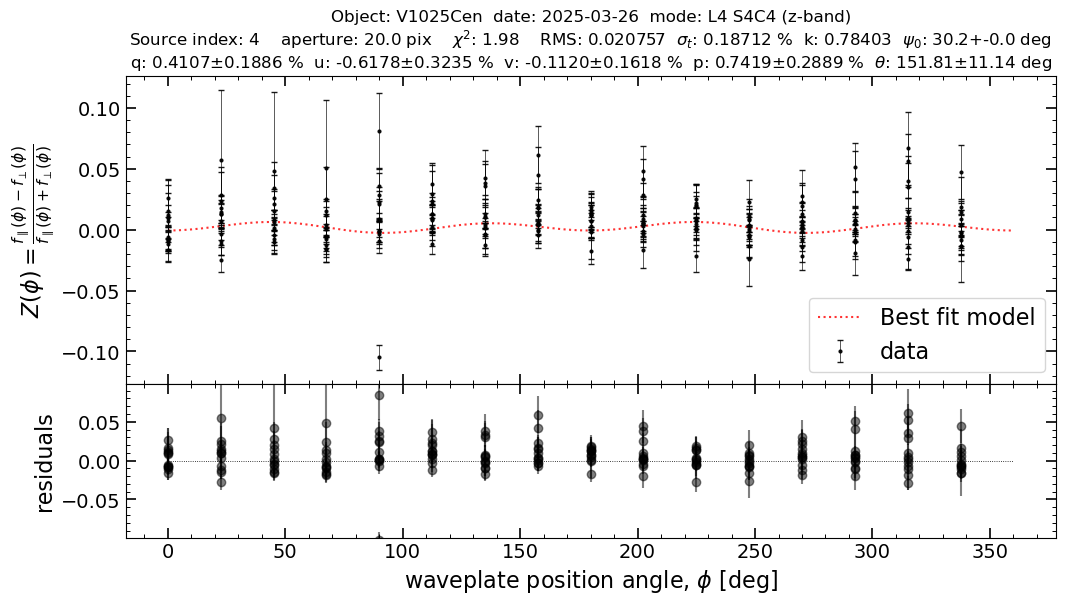

In [11]:
source_index = 4

pol_results = s4pipelib.get_polarimetry_results(polar_example,
                                                source_index=source_index,
                                                min_aperture=5,
                                                max_aperture=21,
                                                plot=True,
                                                verbose=True)

Below we print all variables names for the measurements available in the polar product

In [12]:
for key in pol_results.keys():
    print(key, ":", pol_results[key])

POLAR_PRODUCT : /media/fernando/KINGSTON/Doutorado/2025/reduced/20250325/sparc4acs4/20250325_s4c4_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits
SOURCE_INDEX : 4
POLARIMETRY_SUCCESS : True
APERTURE_INDEX : 6
APERTURE_RADIUS : 20.0
NEXPS : 192
MAG : -14.911+-0.001
RA : 189.56712917341372
DEC : -38.71261923915564
FWHM : 5.940339440038388
X1 : 524.0686671683914
Y1 : 498.4483913562108
X2 : 543.2967048193013
Y2 : 463.121176244555
WAVEPLATE_ANGLES : [  0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180.  202.5 225.  247.5 270.  292.5 315.  337.5
   0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180.  202

And below we show a simple example how to get one of these measurements out. For instance, we're getting the total polarization and the polarization angle. 

In [13]:
p = pol_results["P"]*100
pa = pol_results["THETA"]
print("Polarization: {} %  Angle of polarization: {} deg".format(p,pa) )

Polarization: 0.7+-0.3 %  Angle of polarization: 150+-10 deg deg


Finally, we show below an example of a polarimetric time series product. 

In [14]:
polar_ts = fits.open(polar_time_series_example)
pd.DataFrame(polar_ts[1].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

In [15]:
pd.DataFrame(polar_ts[1].data).columns

Index(['TIME', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2', 'FWHM', 'MAG',
       'EMAG', 'Q', 'EQ', 'U', 'EU', 'V', 'EV', 'P', 'EP', 'THETA', 'ETHETA',
       'K', 'EK', 'ZERO', 'EZERO', 'NOBS', 'NPAR', 'CHI2', 'RMS', 'TSIGMA'],
      dtype='object')

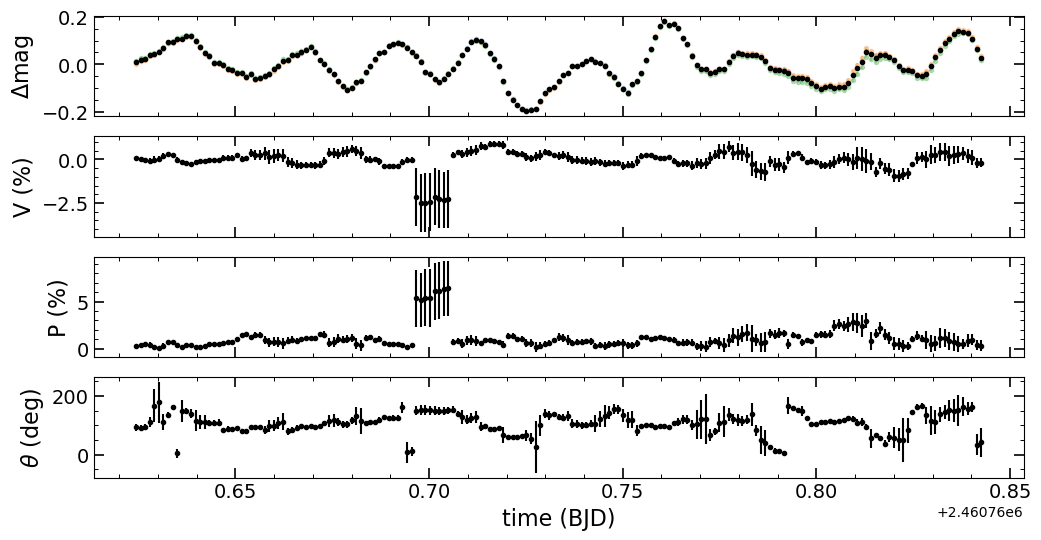

diffmag_C00000,diffmag_err_C00000,diffmag_C00001,diffmag_err_C00001,diffmag_C00002,diffmag_err_C00002,TIME,x1,y1,x2,y2,fwhm,mag,mag_err,magsum,magsum_err,diffmagsum,polarization_1,polarization_1_err,polarization_2,polarization_2_err
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.010192384180053082,0.0019234682960311154,0.0028886614876348915,0.001985983456195758,0.013333654516676674,0.0020439002437027546,2460760.624309336,524.0686671683914,498.4483913562108,543.2967048193013,463.121176244555,6.267493163266565,-11.526874080907412,0.0018318675073837889,-13.804123264165655,0.0013244519947898383,0.00871943003856579,0.003147843872120534,0.0012494335633545979,93.58048409788617,11.351833624413382
0.0214901501481517,0.0019057711323648462,0.014588888084572815,0.0019690707557839743,0.02466489117249715,0.002027824795442008,2460760.6254961025,521.8186671683914,499.1983913562108,541.0467048193013,463.871176244555,6.322568461908123,-11.539068459311776,0.001813364273553928,-13.804883739442847,0.0013252949428119707,0.020153333165739085,0.0033523212021236704,0.0012137349776313263,90.93517141987732,10.354861084989595
0.022465256701071468,0.0018994460004633368,0.017003086436508497,0.0019631670403992925,0.026001698079518576,0.0020219779008887858,2460760.626681353,520.5686671683914,499.9483913562108,539.7967048193013,464.621176244555,6.322568461908123,-11.540627307223541,0.0018066789659069678,-13.804917005659057,0.001325913990919808,0.02167891486129392,0.00455435769813065,0.0011980225931123702,95.95644428665562,7.523222468247789
0.03759196374357998,0.0018749063815610024,0.03348642500898791,0.0019398256779519245,0.04208934101184347,0.0019995804537486276,2460760.627866407,519.8186671683914,499.1983913562108,539.0467048193013,463.871176244555,6.168899868626331,-11.55713941323436,0.0017811926435093368,-13.80562004437727,0.0013261138305583134,0.037487982153900035,0.004282756863841964,0.0024949247760251187,112.04194074660798,16.660961820351293
0.04360641843188695,0.0018588775868861505,0.040464934620356274,0.0019234065195562423,0.04839807080318437,0.0019828727529007926,2460760.6290518427,521.8186671683914,499.6983913562108,541.0467048193013,464.371176244555,5.929801784397712,-11.565339808232672,0.0017645859803329474,-13.807423897479241,0.0013211403523974042,0.043884524050239904,0.001242383300337134,0.0023983182816219913,167.79479278824647,55.20993628598824
0.052766200571367605,0.0018461015210870849,0.050540573745349704,0.0019114142453755614,0.05802682945664195,0.001970637978519623,2460760.6302381065,521.3186671683914,500.9483913562108,540.5467048193013,465.621176244555,5.907382093240724,-11.575773289914107,0.0017511271977408358,-13.80828473268222,0.001321238017151173,0.05345717052869681,0.0008643239484184114,0.002125290068639074,178.91758720191748,70.324669441709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.12723563950777006,0.003043817938812901,0.13621502328876467,0.003164076982476519,0.117600696022226,0.0032545484617318102,2460760.8354841527,518.3186671683914,506.4483913562108,537.5467048193013,471.121176244555,6.640304115663835,-11.519855182640281,0.0028841582336931845,-13.678341037582591,0.0022165717526164705,0.12748275835449974,0.007128175878366125,0.009399612408421276,150.88588500786972,37.71356367576998
0.13805889212077993,0.002976110569712898,0.14675000419912365,0.003094440292308824,0.12950462667697948,0.003185098225107206,2460760.836670085,518.8186671683914,506.6983913562108,538.0467048193013,471.371176244555,6.640304115663835,-11.546010494602317,0.002817157864928403,-13.693473993879648,0.00218369188339801,0.13850511401947863,0.0048424985327512144,0.008835768938957315,151.80030567574204,52.1844229678287


In [16]:
s4plt.plot_polar_time_series(polar_time_series_example, 
                             target=4, 
                             comps=[0,1,2], 
                             plot_total_polarization=True, 
                             plot_polarization_angle=True)